### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
#FATURAMENTO TOTAL

faturamento_total=[]
loja1_fat = sum(loja['Preço'])
loja2_fat = sum(loja2['Preço'])
loja3_fat = sum(loja3['Preço'])
loja4_fat = sum(loja4['Preço'])
faturamento_total.append(loja1_fat)
faturamento_total.append(loja2_fat)
faturamento_total.append(loja3_fat)
faturamento_total.append(loja4_fat)

faturamento_total

[1534509.120000001, 1488459.059999997, 1464025.0300000003, 1384497.5800000026]

# 2. Vendas por Categoria


In [6]:
#VENDAS POR CATEGORIA
cat_produtos=loja['Categoria do Produto'].unique()
print(sorted(cat_produtos))

def vends_cat (loja):
    loja_prod=dict(loja['Categoria do Produto'].value_counts())

    valor_max=max(loja_prod.values())

    for chave, valor in loja_prod.items():
        if valor == valor_max:
            cat_pop = {chave:valor}
            break


    return (loja_prod, cat_pop)

loja1_prod, cat_pop1=vends_cat(loja)
loja2_prod, cat_pop2=vends_cat(loja2)
loja3_prod, cat_pop3=vends_cat(loja3)
loja4_prod, cat_pop4=vends_cat(loja4)

loja1_prod, cat_pop1

['brinquedos', 'eletrodomesticos', 'eletronicos', 'esporte e lazer', 'instrumentos musicais', 'livros', 'moveis', 'utilidades domesticas']


({'moveis': np.int64(465),
  'eletronicos': np.int64(448),
  'brinquedos': np.int64(324),
  'eletrodomesticos': np.int64(312),
  'esporte e lazer': np.int64(284),
  'instrumentos musicais': np.int64(182),
  'livros': np.int64(173),
  'utilidades domesticas': np.int64(171)},
 {'moveis': np.int64(465)})

# 3. Média de Avaliação das Lojas

In [7]:
#MEDIA AVALIAÇÃO POR LOJA

def media(loja):

    media_av=round(loja['Avaliação da compra'].mean(), 2)
    return media_av

media_av1=media(loja)
media_av2=media(loja2)
media_av3=media(loja3)
media_av4=media(loja4)
media_av=[media_av1, media_av2, media_av3, media_av4]
media_av


[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]

# 4. Produtos Mais e Menos Vendidos

In [12]:
#PRODUTOS MAIS E MENOS VENDIDOS

produtos=loja['Produto'].unique()
#print(produtos)


def prod_mais(loja):

    qnt_prods=dict(loja['Produto'].value_counts())
    valor_max=max(qnt_prods.values())
    mais={}
    for chave, valor in qnt_prods.items():
        if valor == valor_max:
            mais[chave] = valor
        else:
            break
    return mais

def prod_menos(loja):

    qnt_prods=dict(loja['Produto'].value_counts())
    valor_min=min(qnt_prods.values())

    menos={}
    for chave, valor in reversed(qnt_prods.items()):
        if valor == valor_min:
            menos[chave] = valor
        else:
            break
    return menos

mais1 = prod_mais(loja)
menos1 = prod_menos(loja)
mais2 = prod_mais(loja2)
menos2 = prod_menos(loja2)
mais3 = prod_mais(loja3)
menos3 = prod_menos(loja3)
mais4 = prod_mais(loja4)
menos4 = prod_menos(loja4)
print(mais1, menos1)

{'Micro-ondas': np.int64(60), 'TV Led UHD 4K': np.int64(60), 'Guarda roupas': np.int64(60)} {'Celular ABXY': np.int64(33), 'Headset': np.int64(33)}


# 5. Frete Médio por Loja


In [13]:
#FRETE MEDIO POR LOJA

def frete_medio(loja):

    media_frt=round(loja['Frete'].mean(), 2)
    return media_frt

media_frt1=frete_medio(loja)
media_frt2=frete_medio(loja2)
media_frt3=frete_medio(loja3)
media_frt4=frete_medio(loja4)
media_frt=[media_frt1,media_frt2,media_frt3,media_frt4]
media_frt

[np.float64(34.69), np.float64(33.62), np.float64(33.07), np.float64(31.28)]

# GRAFICOS

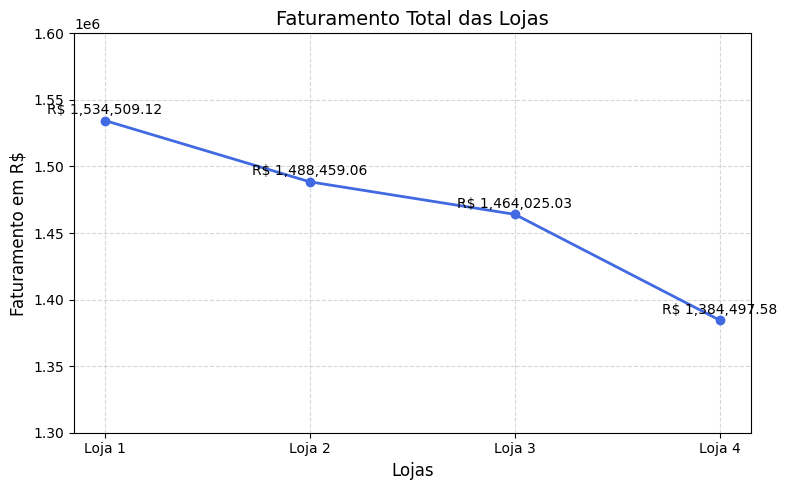

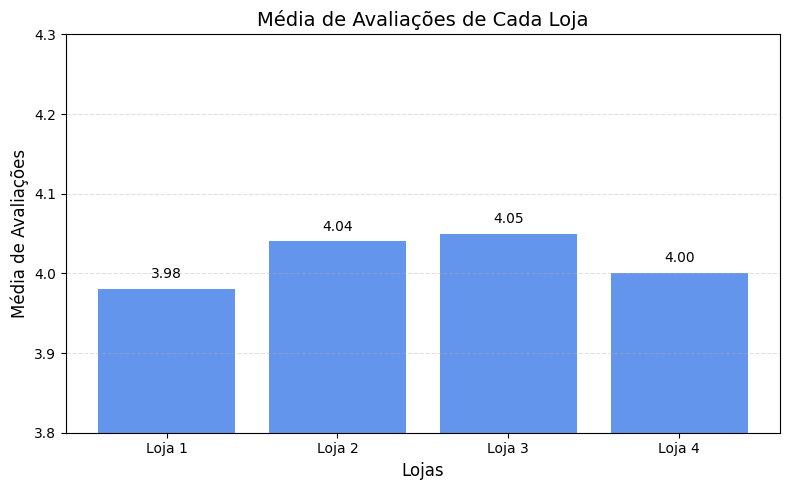

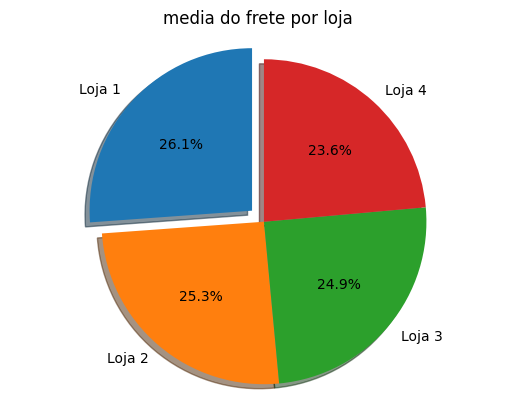

In [15]:
#GERANDO GRÁFICOS
import matplotlib.pyplot as plt

lista_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
plt.figure(figsize=(8, 5))
plt.plot(lista_lojas, faturamento_total, marker='o', linestyle='-', color='royalblue', linewidth=2)
plt.title('Faturamento Total das Lojas', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento em R$', fontsize=12)
plt.ylim(1300000, 1600000)
plt.grid(True, linestyle='--', alpha=0.5)

# Adiciona os valores em cima dos pontos
for i, valor in enumerate(faturamento_total):
    plt.text(lista_lojas[i], valor + 5000, f'R$ {valor:,.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()




plt.figure(figsize=(8, 5))
plt.bar(lista_lojas, media_av, color='cornflowerblue')
plt.title('Média de Avaliações de Cada Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Média de Avaliações', fontsize=12)
plt.ylim(3.8, 4.3)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Rótulos acima das barras
for i, valor in enumerate(media_av):
    plt.text(i, valor + 0.01, f'{valor:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



explode = [0.1 if valor == max(media_frt) else 0 for valor in media_frt]  # Destaque para maior valor

plt.pie(media_frt, labels=lista_lojas, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('media do frete por loja')
plt.axis('equal')
plt.show()


#Relatorio


###Introdução
O objetivo deste relatório é apoiar o Senhor João na tomada de decisão sobre qual das suas quatro lojas virtuais deve ser vendida. Para isso, foram analisados diversos indicadores de desempenho, como faturamento, avaliações dos clientes, frete médio, produtos mais e menos vendidos e a categoria de produtos mais popular em cada loja. As conclusões estão baseadas em dados reais extraídos dos históricos de vendas.


### Desempenho Geral das Lojas
A Loja 1 foi a que apresentou o maior faturamento total, ultrapassando 1,5 milhão de reais em vendas. Em seguida, vêm a Loja 2 e a Loja 3, ambas com faturamento um pouco abaixo, mas ainda sólidos. A Loja 4, por outro lado, teve o menor faturamento entre todas, ficando consideravelmente abaixo das demais.


No quesito avaliação dos clientes, a Loja 3 se destacou com a melhor média de satisfação. A Loja 2 ficou logo atrás, também com uma média bastante positiva. A Loja 4 teve uma avaliação razoável, mas não se sobressaiu. Já a Loja 1, apesar do bom desempenho financeiro, teve a pior média de avaliação entre as quatro.


Quanto ao frete médio, a Loja 4 possui o menor valor, o que poderia ser um atrativo para os consumidores. No entanto, esse diferencial não se traduziu em um maior volume de vendas, como evidenciado pelo seu baixo faturamento. A Loja 1, por sua vez, tem o frete mais alto, o que pode ser um ponto de atenção, embora isso não tenha impedido seu bom desempenho comercial.


### Análise de Produtos e Categorias
Um dado importante é que, em todas as lojas, a categoria de produtos mais vendida foi a de móveis. Isso mostra uma consistência no padrão de consumo dos clientes e sugere que o foco nesse tipo de produto pode ser uma boa estratégia de mercado.


Em relação aos produtos individuais, a Loja 1 teve como item mais vendido uma TV Led UHD 4K, enquanto o produto menos vendido foi um headset. A Loja 2 destacou-se com o livro “Iniciando em programação” como mais vendido e um jogo de tabuleiro como o menos procurado. A Loja 3 teve como destaque um kit de banquetas, enquanto os blocos de montar foram os menos vendidos. Já na Loja 4, o item mais vendido foi uma cama box, mas a guitarra foi o produto com menos saída.


### Conclusão: Qual loja vender?
Com base em todas essas análises, a recomendação é que o Senhor João venda a Loja 4.

Apesar de ter o menor frete médio, a Loja 4 apresenta o pior desempenho em termos de faturamento. Além disso, sua avaliação média dos clientes não é a melhor, e ela não se destaca em nenhum dos outros indicadores analisados. Mesmo com produtos de maior valor agregado, como a cama box, ela não conseguiu alcançar o mesmo nível de performance das demais lojas.

Por outro lado, a Loja 1, mesmo com uma média de avaliação mais baixa, tem o maior faturamento, o que demonstra forte potencial de lucro. A Loja 3 se mostra bastante equilibrada, com boa avaliação, faturamento consistente e frete acessível. Já a Loja 2, embora tenha desempenho mediano, também se mantém estável.